## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256 ]
MOMENTUM = 0.95

In [9]:
results = {}

for batch_size in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.2f" % (batch_size))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "batch_size_%s" % (str(batch_size))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0814 08:53:17.877147  8848 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0814 08:53:17.960147  8848 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Experiment with Regulizer = 2.00


W0814 08:53:18.404147  8848 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0814 08:53:18.548147  8848 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

Epoch 48/50
50000/50000 [==============================] - 55s 1ms/step - loss: 1.1199 - acc: 0.6045 - val_loss: 1.3512 - val_acc: 0.5358
Epoch 49/50
50000/50000 [==============================] - 53s 1ms/step - loss: 1.1116 - acc: 0.6071 - val_loss: 1.3309 - val_acc: 0.5371
Epoch 50/50
50000/50000 [==============================] - 55s 1ms/step - loss: 1.1058 - acc: 0.6091 - val_loss: 1.3544 - val_acc: 0.5297
Experiment with Regulizer = 32.00
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)   

50000/50000 [==============================] - 28s 552us/step - loss: 0.8094 - acc: 0.7115 - val_loss: 1.6587 - val_acc: 0.4914
Epoch 47/50
50000/50000 [==============================] - 28s 552us/step - loss: 0.8022 - acc: 0.7113 - val_loss: 1.5732 - val_acc: 0.5180
Epoch 48/50
50000/50000 [==============================] - 28s 552us/step - loss: 0.7938 - acc: 0.7153 - val_loss: 1.6426 - val_acc: 0.5014
Epoch 49/50
50000/50000 [==============================] - 28s 553us/step - loss: 0.7889 - acc: 0.7178 - val_loss: 1.5423 - val_acc: 0.5129
Epoch 50/50
50000/50000 [==============================] - 28s 552us/step - loss: 0.7895 - acc: 0.7180 - val_loss: 1.6165 - val_acc: 0.4981
Experiment with Regulizer = 128.00
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1

50000/50000 [==============================] - 6s 117us/step - loss: 0.2683 - acc: 0.9204 - val_loss: 2.2749 - val_acc: 0.4684
Epoch 43/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.2461 - acc: 0.9296 - val_loss: 2.1407 - val_acc: 0.4798
Epoch 44/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.2418 - acc: 0.9289 - val_loss: 2.3142 - val_acc: 0.4659
Epoch 45/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.2273 - acc: 0.9350 - val_loss: 2.2868 - val_acc: 0.4698
Epoch 46/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.2130 - acc: 0.9390 - val_loss: 2.3490 - val_acc: 0.4636
Epoch 47/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.2077 - acc: 0.9411 - val_loss: 2.3485 - val_acc: 0.4652
Epoch 48/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.1923 - acc: 0.9469 - val_loss: 2.3606 - val_acc: 0.4763
Epoch 49/50
50000/50000 [==============

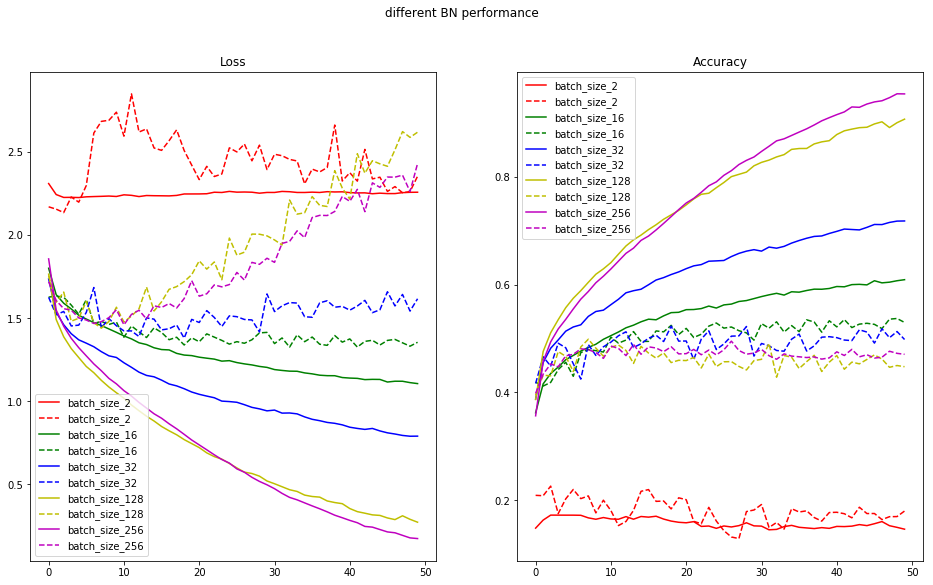

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(16,9))
plt.subplot(121).set_title('Loss')
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.legend(loc = 'best')

plt.subplot(122).set_title('Accuracy')
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.legend(loc = 'best')
plt.suptitle('different BN performance')
plt.show()

## 比較放置BN的位置

In [21]:
#BN放在activation函數前
def build_mlp_beforeActivation(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = keras.layers.Activation('relu')(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = keras.layers.Activation('relu')(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

#BN放在layer函數前
def build_mlp_afterInputLayer(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units,
                                   activation="relu",
                                   name="hidden_layer"+str(i+1))(x)            
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu",
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [23]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 32
MOMENTUM = 0.95
models = ['Normal','BeforeAct','AfterInput']

In [24]:
results = {}

for i in range(3):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Mode: %s" % (models[i]))
    if i == 0:
        model = build_mlp(input_shape=x_train.shape[1:])
    elif i == 1:
        model = build_mlp_beforeActivation(input_shape=x_train.shape[1:])
    else:
        model = build_mlp_afterInputLayer(input_shape=x_train.shape[1:])
        
    model.summary()    
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "%s_models" % (models[i])
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Mode: Normal
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512     

Epoch 45/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.0507 - acc: 0.9939 - val_loss: 2.5444 - val_acc: 0.4761
Epoch 46/50
50000/50000 [==============================] - 6s 125us/step - loss: 0.0441 - acc: 0.9953 - val_loss: 2.5537 - val_acc: 0.4858
Epoch 47/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.0385 - acc: 0.9969 - val_loss: 2.6343 - val_acc: 0.4858
Epoch 48/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.0344 - acc: 0.9971 - val_loss: 2.6330 - val_acc: 0.4803
Epoch 49/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.0326 - acc: 0.9972 - val_loss: 2.5518 - val_acc: 0.4815
Epoch 50/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.0296 - acc: 0.9980 - val_loss: 2.6110 - val_acc: 0.4757
Mode: AfterInput
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLay

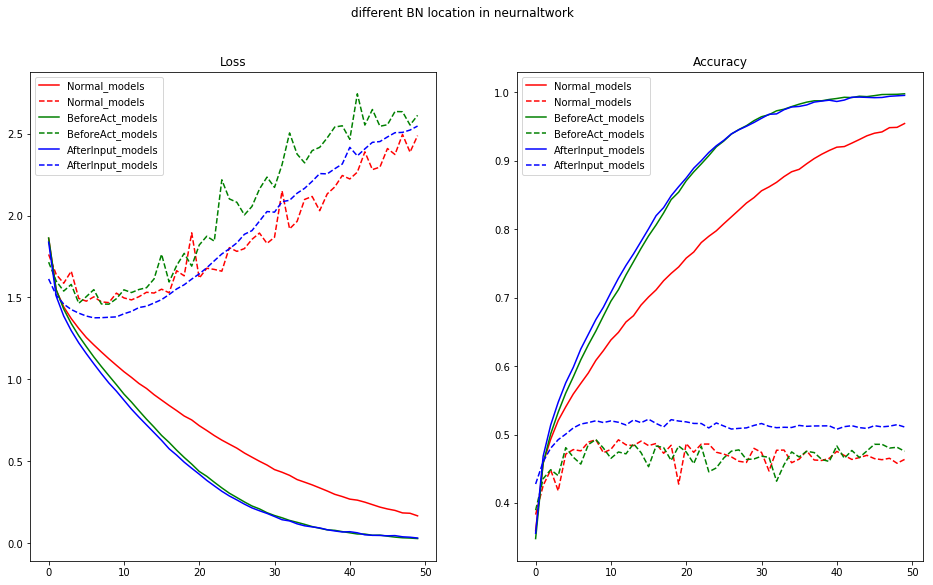

In [25]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(16,9))
plt.subplot(121).set_title('Loss')
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.legend(loc = 'best')

plt.subplot(122).set_title('Accuracy')
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.legend(loc = 'best')
plt.suptitle('different BN location in neurnaltwork')
plt.show()